# Synthetic data generation

Let’s generate a synthetic dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# define function that creates synthetic data
def createData(n, range, noiseLevel, beta):
    b0 = beta[0]
    b1 = beta[1]
    b2 = beta[2]
    b3 = beta[3]
    b4 = beta[4]
    b5 = beta[5]  
    
    x1 = np.random.uniform(-range, range, n);
    x2 = np.random.uniform(-range, range, n);
    x3 = x1*x2;
    x4 = x1**2;
    x5 = x2**2;

    noise = np.random.normal(-noiseLevel, noiseLevel, n)
    y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + noise;

    X = np.vstack((x1, x2, x3, x4, x5)).T

    return X, y

In [3]:
# create synthetic data set
n = 1000;
range = 10;
noiseLevel = 25;
beta = np.array([6, 5, 4, 3, 2, 0])
X, y = createData(n, range, noiseLevel, beta)

In [4]:
print('Shape of X is ', X.shape)
print()
print(X)

Shape of X is  (1000, 5)

[[  7.72603042   1.20261649   9.29145156  59.691546     1.44628641]
 [ -1.28934569   2.07663304  -2.67749785   1.6624123    4.31240477]
 [  5.67695053  -3.09271927 -17.55721428  32.22776733   9.56491246]
 ...
 [  7.38287187   5.53287822  40.84853095  54.50679708  30.61274135]
 [  1.29950087  -8.66096929 -11.25493713   1.68870251  75.01238904]
 [  5.85609813  -4.32357625 -25.31928681  34.29388529  18.69331162]]


In [5]:
print('Shape of Y is ', y.shape)
print()
print(y)

Shape of Y is  (1000,)

[ 1.63362149e+02 -1.17543355e+01 -2.99637531e+01  6.71407259e+01
  9.46622469e+01 -5.36588454e+01  4.58915934e+01 -7.89387700e+01
  1.14360141e+02 -3.84827545e+01  3.75858429e+01  1.73651766e+01
  4.07835706e+01  1.15707187e+02 -2.90319933e+01  1.89889756e+02
  5.50891183e+00 -4.30173837e+01  1.81426021e+02 -1.72833583e+02
 -3.44992270e+01  1.13446582e+02 -6.67973283e+01 -1.14184734e+02
  2.83706423e+01  9.47357275e+01  2.91975432e+01 -6.77106704e+01
 -1.61213635e+01  1.67004771e+00  9.84326896e+00 -4.05044046e+01
 -6.07411766e+00  3.83935124e+02  1.14424041e+02  2.95960599e+01
  7.52471699e+00  4.72426128e+01 -5.23818593e+01 -8.97151058e+01
 -6.75985091e+01  1.30158437e+02 -2.82162753e+01 -1.38514005e+01
 -6.02342816e+01  2.03790659e+02 -2.12835934e+01  1.48499941e+02
 -4.11712541e+01  1.72242866e+02  6.01150372e+00 -1.11170719e+02
  1.32871070e+02 -1.91156995e+01  8.63471845e+01  3.06859948e+02
 -5.63699432e+01  3.36910397e+02  2.14870350e+02 -3.64538631e+01
 

# Ridge Regression

In [6]:
from sklearn.preprocessing import StandardScaler

# Ridge Regression function
def ridgeRegression(X, y, alpha, biasRegularization, normalizeData): 
    if (normalizeData):
        X = StandardScaler().fit_transform(X)

    n = len(X)

    # add ones to the left of x
    Xn = np.c_[np.ones((n,1)), X]

    p = len(Xn[0])
    
    D = np.identity(p)
    if (biasRegularization == False):
        D[0,0] = 0.0        

    # solve for w    
    Xa = (1/n)*(Xn.T.dot(Xn));
    Xb = (1/n)*(Xn.T.dot(y));    
    w = np.linalg.inv(Xa + (alpha/p)*D).dot(Xb)

    return w    

<IPython.core.display.Javascript object>


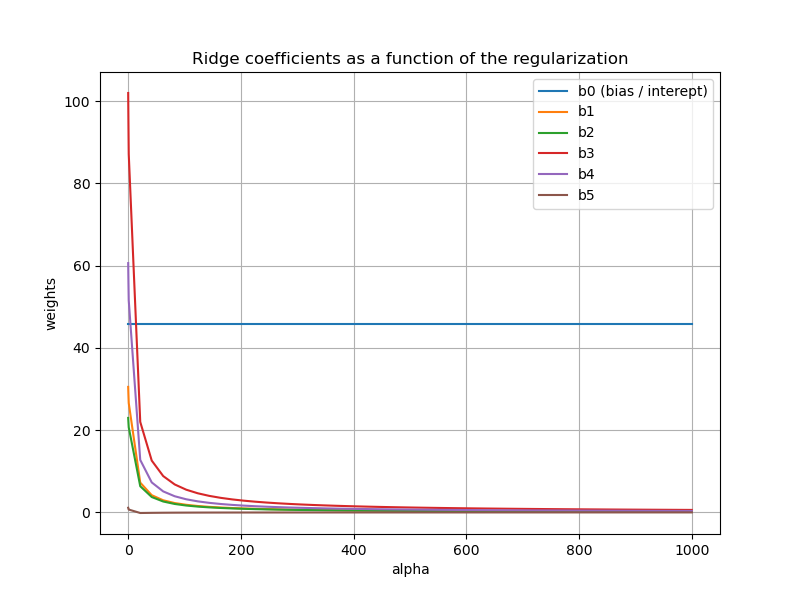

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

ridge_alphas = np.hstack((np.linspace(0, 1, 10), np.linspace(1, 1000)))

# create ridge paths 
biasRegularization = False
normalizeData = True

ridge_coefficients = []
for alpha in ridge_alphas:
    w = ridgeRegression(X, y, alpha, biasRegularization, normalizeData)
    ridge_coefficients.append(w)
    #print(w)

# show ridge paths
plt.figure(1, figsize=(8,6))
plt.plot(ridge_alphas, ridge_coefficients)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(('b0 (bias / interept)', 'b1', 'b2', 'b3', 'b4', 'b5'))
plt.grid()
plt.show()

# LASSO Regression

In [8]:
# LASSO Regression function
def lassoRegression(X, y, alpha, biasRegularization, normalizeData, maxIteration, convergenceTolerance):
    if (normalizeData):
        X = StandardScaler().fit_transform(X)

    n = len(X)

    # add ones to the left of x
    Xn = np.c_[np.ones((n,1)), X]

    p = len(Xn[0])

    Xa = (1/n)*(Xn.T.dot(Xn));
    Xb = (1/n)*(Xn.T.dot(y));
    
    epsilon = 1e-3

    w = np.ones(p)
    w_old = np.zeros(p)
    
    while maxIteration > 0:
        L = np.diag((np.abs(w) + epsilon)**(-1.0))
        if (biasRegularization == False):
            L[0,0] = 0.0        

        # solve for w    
        w = np.linalg.inv(Xa + (alpha/p)*L).dot(Xb)

        # check for convergence
        if (np.linalg.norm((w - w_old), ord=1) < convergenceTolerance):
            break;

        w_old = w
        
        maxIteration -= 1
        
    return w

<IPython.core.display.Javascript object>


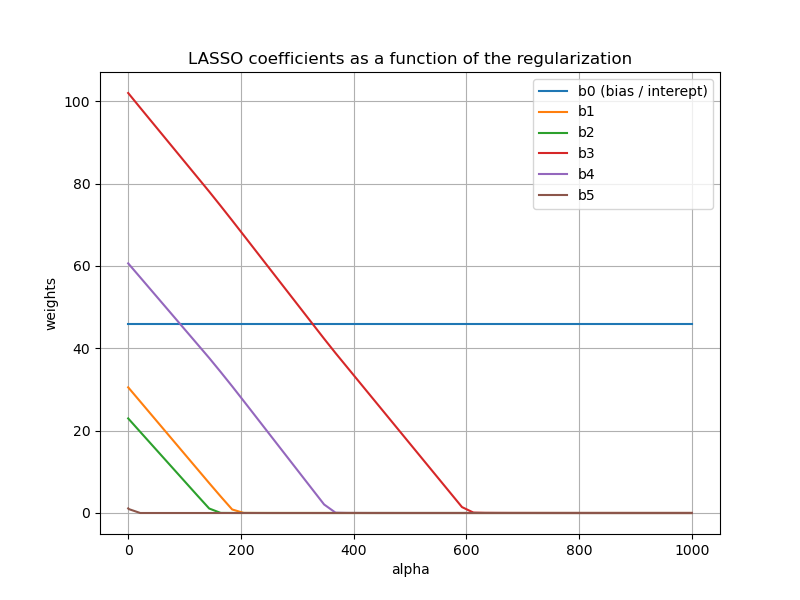

In [9]:
lasso_alphas = np.hstack((np.linspace(0, 1, 10), np.linspace(1, 1000)))

# create LASSO paths 
biasRegularization = False
normalizeData = True
maxIteration = 1000
convergenceTolerance = 1e-3

lasso_coefficients = []
for alpha in lasso_alphas:
    w = lassoRegression(X, y, alpha, biasRegularization, normalizeData, maxIteration, convergenceTolerance)
    lasso_coefficients.append(w)
    #print(w)

# show LASSO paths
plt.figure(2, figsize=(8,6))
plt.plot(lasso_alphas, lasso_coefficients)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.legend(('b0 (bias / interept)', 'b1', 'b2', 'b3', 'b4', 'b5'))
plt.grid()
plt.show()